# Dimensionality Reduction - Customer Satisfaction Prediction

## 1. Problem Context

<center><img src="https://github.com/FabianoManetti/dimensionality_reduction_customer_satisfaction/customer_satisfaction.jpg" width="400" height="400"></center><br>

It is essential for Banks to monitor their **Customers' Satisfaction** since dissatisfied customers tend to cancel their services with that institution and are likely to migrate to another bank.

Santander Bank was asking Data Scientists to help them identify dissatisfied customers at the beggining of the relationship. This would allow Santander to create proactive measures in order to retain that client.

For this project, it was requested an **accuracy of, at least, 70%**.

The dataset consists of many anonymous features from different customers that will demand the use of **dimensionality reduction** tools.

🏦 **Objectives**
* Import and treat the data
* Reduce the number of features
* Achieve the minimum score


## 2. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## 3. Reading dataset

In [2]:
# Training dataset:

df_train = pd.read_csv('train.csv')
df_train.sample(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
39929,79902,10,85,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
11641,23345,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102190.650000,0
51663,103179,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99436.020000,0
6820,13688,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58921.260000,0
33730,67460,2,25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88649.610000,0
34196,68358,2,51,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159606.540000,0
22956,45907,2,74,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101031.900000,0
36579,73093,2,35,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
16332,32799,2,27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420822.780000,0
46772,93525,2,53,90.0,419.94,963.24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137372.760000,0


In [3]:
# Training dataset dimension:

df_train.shape

(76020, 371)

In [4]:
# Dropping any duplicate value:

df_train = df_train.drop_duplicates()
df_train.shape

(76020, 371)

In [5]:
# Testing dataset:

df_test = pd.read_csv('test.csv')
df_test.sample(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
34588,69225,2,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198938.190000
7484,14950,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82543.890000
34264,68587,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77239.560000
19808,39522,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65221.110000
62319,124855,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300609.240000
65865,131942,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
22466,44868,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79595.040000
10277,20512,2,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65128.830000
31852,63765,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77919.360000
28001,55984,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,493838.460000


In [6]:
# Testing dataset dimension: 

df_test.shape

(75818, 370)

In [7]:
# Dropping any duplicate value:

df_test = df_test.drop_duplicates()
df_test.shape

(75818, 370)

## 4. Analysing Datasets

Let's start by checking if the rows in the testing dataset are different from those in the training dataset:

In [8]:
test_ID = df_test.ID

sum_total = 0

for id in test_ID:

    sum = df_train[df_train.ID == id].shape[0]

    sum_total += sum

In [9]:
print(sum_total)

0


* We can observe that, in fact, the testing dataset consists of **unique** values.

How is our `Target` feature distributed in the training dataset?

In [10]:
df_train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

* The label 1 is related to the **dissatisfied** customers. This way, we observe a majority of data of satisfied customers. Later on, we'll have to use balancing techniques to properly address our problem.

We can now check for missing or null values in both datasets:

In [11]:
df_train.isnull().sum().sum()

0

In [12]:
df_train.isna().sum().sum()

0

In [13]:
df_test.isnull().sum().sum()

0

In [14]:
df_test.isna().sum().sum()

0

* There isn't any **missing** or **null** value in the training and testing dataset.

Since the **testing** dataset does not contain our target features, we decided at this point **not to use it** in this project.

In [15]:
# Quick statistics:

df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## 5. Reducing Features

Let's start our work by dropping the `ID` column, since it does not give us useful information:

In [16]:
df_train = df_train.drop(columns = 'ID')

### 5.1 First reduction: Variance Threshold

The **variance** is simply the average of the squared differences from the mean. It is import in the context of machine learning because features with 0 or close to 0 variance are generally **useless** in terms of prediction power.

For the purpose of this project, we'll make use of the `VarianceThreshold` estimator. It will select all the features in our dataset whose variance is higher than a set threshold. 

In [17]:
df_1 = df_train.copy()

We will set our threshold as **0.01** for this case. It is necessary to bring all the features to the **same scale** or the estimator will be returning a potencially false output. We can use `MinMaxScaler` inside a `Pipeline` model for this.

In [18]:
scaler = MinMaxScaler()
selector = VarianceThreshold(threshold = 0.01)

pipeline = Pipeline([('scaler', scaler), ('selector', selector)])

pipeline.fit_transform(df_1)

array([[0.18      , 0.        , 1.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.29      , 0.        , 1.        , ..., 1.        , 0.66666667,
        0.        ],
       [0.18      , 0.        , 1.        , ..., 0.        , 0.33333333,
        0.        ],
       ...,
       [0.18      , 0.        , 1.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.2       , 0.        , 1.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.41      , 0.        , 1.        , ..., 0.        , 0.66666667,
        0.        ]])

In [19]:
# Getting the names of the features that satisfied our condition:

columns_df_1 = pipeline.get_feature_names_out()

In [20]:
columns_df_1

array(['var15', 'ind_var1_0', 'ind_var5_0', 'ind_var5', 'ind_var8_0',
       'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0',
       'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0',
       'ind_var13', 'ind_var14_0', 'ind_var24_0', 'ind_var24',
       'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26',
       'ind_var25_0', 'ind_var25', 'ind_var30', 'ind_var37_cte',
       'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0',
       'ind_var41_0', 'num_var4', 'num_var8', 'num_var13_corto_0',
       'var36', 'ind_var10_ult1', 'ind_var10cte_ult1',
       'ind_var9_cte_ult1', 'ind_var9_ult1', 'ind_var43_emit_ult1',
       'ind_var43_recib_ult1', 'num_meses_var5_ult3',
       'num_meses_var8_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3', 'num_meses_var39_vig_ult3', 'TARGET'],
      dtype=object)

In [21]:
# Filtering the first dataframe with these columns:

df_1 = df_1.loc[:, columns_df_1]

In [22]:
# Checking for the dimension:

df_1.shape

(76020, 45)

* We were able to **eliminate** a great number of columns, 325 to be exact. This result shows us that many features in our initial dataframe were potentially useless to be used as predictors.

### 5.2 Second reduction: Multicollinearity

Multicollinearity refers to the occurance of high **intercorrelations** among two or more independent variables. 

Multicollinearity causes problems in the interpretability of the model result, for this reason it is advisable to drop features that present high correlation with each other.

In [23]:
df_2 = df_1.copy()

In order to calculate the correlation among the features we will use the function `corr`. We'll also establish a correlation threshold of **± 0.7** and keep only features in this interval.

In [24]:
pair_drop = []

for i in df_2.columns:
    
    for j in df_2.columns:
        
        if i != j:
            
            cor  = df_2[i].corr(df_2[j])
            
            if cor >= 0.7 or cor <= -0.7:
                
                features = (i, j)
                
                if features not in pair_drop and tuple(reversed(features)) not in pair_drop:
                    
                    pair_drop.append(features)
                    
features_drop = []

for i in pair_drop:
    
    feature = i[0]
    
    if feature not in features_drop:
        
        features_drop.append(feature)

In [25]:
df_2 = df_2.drop(columns = features_drop)

df_2.columns

Index(['var15', 'ind_var13_largo_0', 'ind_var14_0', 'ind_var40_0', 'num_var4',
       'var36', 'ind_var9_ult1', 'ind_var43_emit_ult1', 'ind_var43_recib_ult1',
       'num_meses_var5_ult3', 'num_meses_var8_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3', 'num_meses_var39_vig_ult3', 'TARGET'],
      dtype='object')

In [26]:
df_2.shape

(76020, 15)

* Once again, we were able to **reduce** the dimensionality of the dataframe. 

### 5.3 Third reduction: Recursive Feature Elimination

Recursive Feature Elimination, or RFE for short, is a feature reduction method that works by **recursively training** diferent sets of features and ranking them by their importance with the use of an estimator.

The supervised learning estimator needs to provide information about feature importance. For the purspose of this project, we'll make use of `Logistic Regression` as the auxiliary model.

In [27]:
df_3 = df_2.copy()

Let's first split the dataframe between our target variable and the variable containing our predictor features. We will choose the `RFECV` model instead of RFE because the first allows us to test cross validation. We also must to normalize our features, so we chose `RobustScaler` algorithm for this purpose. Finally, we'll use `SMOTE` technique to treat our imbalanced data.

In [28]:
X_3 = df_3.drop(columns = ['TARGET'])
y_3 = df_3['TARGET']

Pipeline(steps=[('Balancing', SMOTE(random_state=53)),
                ('Scaler', RobustScaler()),
                ('Model',
                 RFECV(ax=<AxesSubplot:>, cv=3,
                       estimator=LogisticRegression(max_iter=300,
                                                    solver='liblinear'),
                       scoring='accuracy', step=0.1))])

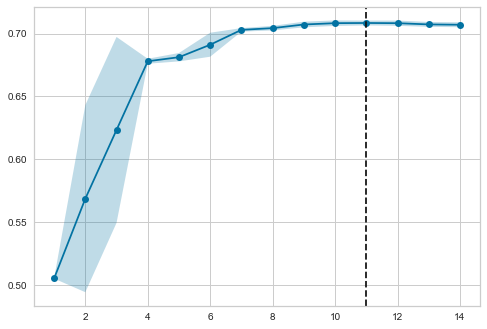

In [30]:
model_aux = LogisticRegression(solver = 'liblinear',  max_iter = 300)

rfe_model = RFECV(model_aux, scoring = 'accuracy', cv = 3, step = 0.1)

scaler = RobustScaler()

smote_model  = SMOTE(random_state = 53, k_neighbors = 5)

pipeline = Pipeline([('Balancing', smote_model), ('Scaler', scaler), ('Model', rfe_model)])

pipeline.fit(X_3, y_3)

* RFECV model achieved the highest accuracy model with **11 features**. 

In [31]:
# Checking the mean of scores of the cross validation:

rfe_model.cv_scores_.mean()

0.6715384351954322

Let's print the best features so far:

In [32]:
best_features_df_3 = list(X_3.columns[rfe_model.support_])
print('Best features: ', best_features_df_3)

Best features:  ['var15', 'ind_var13_largo_0', 'ind_var14_0', 'ind_var40_0', 'var36', 'ind_var43_emit_ult1', 'ind_var43_recib_ult1', 'num_meses_var5_ult3', 'num_meses_var8_ult3', 'num_meses_var12_ult3', 'num_meses_var13_corto_ult3']


### 5.4 Fourth reduction: Random Forest Feature Importance

The ensemble estimator **Random Forest** has the property `Feature Importance`, which returns us the features that contribute most to the reduction of the Gini impurity criterion.

We'll make use again of the `Pipeline`, `RobustScaler` and  `SMOTE` methods and test the **accuracy** of the model with cross validation. Let's create a function for this purpose.

In [33]:
def cross_validate_pipeline(model, X, y, scaler = RobustScaler(), sinthetic_model = SMOTE(random_state = 53, k_neighbors = 5),
                           cv = StratifiedKFold(n_splits = 10, shuffle=True)):
    
    # Splitting the data with 25% test size:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 53, stratify = y)
    
    pipeline = Pipeline([('Balancing', sinthetic_model), ('Normalization', scaler), ('Model', model)])
    
    cv_result =  cross_validate(pipeline, X_train, y_train, cv = cv, return_train_score = False, scoring = 'accuracy')
    
    pipeline.fit(X_train, y_train)
    
    score_pipeline = pipeline.score(X_test, y_test)
    
    y_pred = pipeline.predict(X_test)

    class_rep = classification_report(y_test, y_pred)
    
    return cv_result, score_pipeline, model, class_rep

In [34]:
# Creating the variables to the model with the best features from the last step:

X = df_train.loc[:, best_features_df_3]
y = df_train['TARGET']

# Calling the function previously created:

cv_result, score_pipeline, model, class_rep = cross_validate_pipeline(X= X, y = y, 
                                                        model = RandomForestClassifier(max_depth=6,n_jobs=-1,n_estimators=500))

Let's print the accuracy score of both validation set and testing set:

In [35]:
print(cv_result['test_score'].mean())

0.7802856341977209


In [36]:
print(score_pipeline)

0.7843725335438042


* We can observe that we achieved already the minimum accuracy requested for this project.

We can now plot the importance score of each feature in the model:

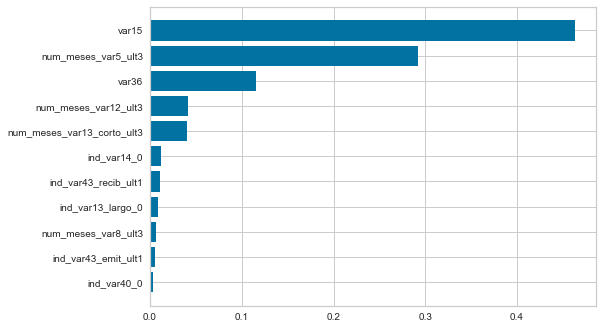

In [37]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.show()

* It is interesting to note that only a few features in our dataframe are responsible for most of the power of prediction.

We will set a **threshold value of 0.1** and check if we can keep reducing the dimensionality without losing accuracy score:

In [38]:
columns_df_4 = list(X.columns[model.feature_importances_ > 0.1])

In [39]:
print(columns_df_4)

['var15', 'var36', 'num_meses_var5_ult3']


## 6. Testing predictive models

At this part of the project, we will test different algorithms using the final set of features that we found in our fourth reduction step. Our goal is to improve or at least keep our current accuracy score.

In [40]:
# Creating the variables to the model with the best features from the fourth step:

X = df_train.loc[:, columns_df_4]
y = df_train['TARGET']

Establishing the chosen models to be tested:

In [41]:
models = {'Logistic Regression': LogisticRegression(random_state = 53, max_iter = 900),
           'KNN': KNeighborsClassifier(),
           'Decision Tree Classifier': DecisionTreeClassifier(random_state = 53),
           'Random Forest Classifier': RandomForestClassifier(random_state = 53,  n_estimators = 500, max_depth=6),
           'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators = 500, random_state = 53),
           'XGBoost Classifier': xgb.XGBClassifier(learning_rate=0.15, n_estimators=500, seed = 53)}

We can then test our chosen models.

In [42]:
results = {}

class_report = {}

for name, method in models.items():
    
    cv_result, score_pipeline, model, class_rep = cross_validate_pipeline(X= X, y = y, model = method)
    
    results[name + '_cv_score'] = cv_result['test_score'].mean()
    
    results[name + '_test_score'] = score_pipeline
    
    class_report[name] = class_rep

Let's check the results for them:

In [43]:
df_results = pd.DataFrame(index = models.keys())

df_results['Cross_validation_score'] = [score for name, score in results.items() if 'cv_score' in name]

df_results['Test_score'] = [score for name, score in results.items() if 'cv_score' not in name]

df_results

,Cross_validation_score,Test_score
Logistic Regression,0.650899,0.649513
KNN,0.956205,0.956853
Decision Tree Classifier,0.741261,0.743699
Random Forest Classifier,0.780620,0.790003
Gradient Boosting Classifier,0.762781,0.754065
XGBoost Classifier,0.746067,0.739227


* We can see that the `KNN` model had the **highest scores** in both validation and testing set, followed by `Random Forest Classifier`.

However, it is possible that the `KNN` is privileging the class that has more data to the detriment of balancing accuracy. Let's plot the `Classification Report` of the models to have a broader view of this situation:

In [44]:
for name, score in class_report.items():
    
    print(name + ' :')
    
    print(score)
    
    print('_'*55)
    
    print('\n')

Logistic Regression :
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     18253
           1       0.08      0.71      0.14       752

    accuracy                           0.65     19005
   macro avg       0.53      0.68      0.46     19005
weighted avg       0.95      0.65      0.75     19005

_______________________________________________________


KNN :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18253
           1       0.06      0.01      0.01       752

    accuracy                           0.96     19005
   macro avg       0.51      0.50      0.49     19005
weighted avg       0.93      0.96      0.94     19005

_______________________________________________________


Decision Tree Classifier :
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     18253
           1       0.10      0.65      0.17       752

    accurac

* In fact, it is possible to observe that the `KNN` algorithm prioritized the optimization of the majority class. We could have used the `Balanced Accuracy Score` or another specific metric, however we will follow the previously established guideline.


For this reason, and according to the results obtained previously, we chose to proceed with the model `Random Forest Classifier`. In the follow, we will try to **optimize the hyperparameters** of the chosen model with the help of the `GridSearchCV` technique:

In [45]:
chosen_model = RandomForestClassifier(random_state = 53,  n_estimators = 500, max_depth = 6)

hyperparmeters = {'Model__n_estimators': [400, 500, 600, 700],
                 'Model__max_depth': [4, 5, 6, 7, 8],
                 'Model__min_samples_split': [2, 3],
                 'Model__criterion': ['gini', 'entropy']}

scaler = RobustScaler()

sinthetic_model  = SMOTE(random_state = 53, k_neighbors = 5)

pipeline = Pipeline([('Balancing', sinthetic_model), ('Scaler', scaler), ('Model', chosen_model)])

cv = StratifiedKFold(n_splits = 5, shuffle=True)

otimiz = GridSearchCV(pipeline, hyperparmeters, cv = cv, n_jobs = -1, scoring = 'accuracy')

otimiz.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('Balancing', SMOTE(random_state=53)),
                                       ('Scaler', RobustScaler()),
                                       ('Model',
                                        RandomForestClassifier(max_depth=6,
                                                               n_estimators=500,
                                                               random_state=53))]),
             n_jobs=-1,
             param_grid={'Model__criterion': ['gini', 'entropy'],
                         'Model__max_depth': [4, 5, 6, 7, 8],
                         'Model__min_samples_split': [2, 3],
                         'Model__n_estimators': [400, 500, 600, 700]},
             scoring='accuracy')

We can finally test our chosen model with the best hyperparmeters:

In [49]:
opti_model = RandomForestClassifier(random_state = 53,  n_estimators = otimiz.best_params_['Model__n_estimators'], 
                                    max_depth = otimiz.best_params_['Model__max_depth'],
                                    min_samples_split = otimiz.best_params_['Model__min_samples_split'],
                                    criterion = otimiz.best_params_['Model__criterion'])

cv_result, score_pipeline, model, class_rep = cross_validate_pipeline(X= X, y = y, model = opti_model)

In [50]:
print(cv_result['test_score'].mean())

0.8169075883786873


In [51]:
print(score_pipeline)

0.8317284925019731


In [52]:
print(class_rep)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     18253
           1       0.13      0.60      0.22       752

    accuracy                           0.83     19005
   macro avg       0.56      0.72      0.56     19005
weighted avg       0.95      0.83      0.88     19005



## 7. Final Considerations

It is essential for a financial institution that customers **dissatisfied** with its services are quickly identified and preventive measures are taken to resolve this situation.

This work is essentially relevant for established banks, where the competition with new digital players requires precise initiatives in order to **retain these customers**.

This project involved a typical problem within Data Science, which is the ability to **reduce the dimensionality** of the dataset, since the creation of predictive models in this situation could lead to inaccuracies in results and a decrease in decision speed.

At the end of the work, we were able to train a `Random Forest` prediction model with an average **accuracy of 83%**.

In order to improve the model performance, the following strategies may be further studied:

* Other techniques for dimensionality reduction, like PCA, could be studied;
* The original testing dataset could be used somehow;
* Other oversampling and undersampling techniques could be used;
* More models or even a blend of models could be tested.